---
# 알고리즘의 긍정적 사례 시각화
---

## 시각화1
### `연도별 유료 OTT 이용률 추이 (2020~2024)`
데이터: `유료로_이용_중인_온라인동영상서비스_OTT_중복응답(2020~2024).csv`

In [3]:
import pandas as pd

# 1) 데이터 불러오기
ott = pd.read_csv("C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\유료로_이용_중인_온라인동영상서비스_OTT_중복응답(2020~2024).csv", encoding='euc-kr')

In [4]:
# 2) 2024년
ott_24 = ott.iloc[0:2, 2:24]
new_header = ott_24.iloc[0]
ott_24 = ott_24[1:].copy()
ott_24.columns = new_header

# 3) 2023년
ott_23 = ott.iloc[0:2, 24:44]
new_header = ott_23.iloc[0]
ott_23 = ott_23[1:].copy()
ott_23.columns = new_header

# 4) 2022년
ott_22 = ott.iloc[0:2, 44:63]
new_header = ott_22.iloc[0]
ott_22 = ott_22[1:].copy()
ott_22.columns = new_header

# 5) 2021년 
ott_21 = ott.iloc[0:2, 63:78]
new_header = ott_21.iloc[0]
ott_21 = ott_21[1:].copy()
ott_21.columns = new_header

# 6) 2020년 
ott_20 = ott.iloc[0:2, 78:]
new_header = ott_20.iloc[0]
ott_20 = ott_20[1:].copy()
ott_20.columns = new_header

# 7) 2020년~2024년 데이터 병합
df_list = []

for y in range(20, 25):
    df = globals()[f"ott_{y}"].copy()
    df = df.reset_index(drop=True)              # index 초기화
    df = df.loc[:, ~df.columns.duplicated()]    # 열 중복 제거 (선택)
    df["year"] = 2000 + y
    df_list.append(df)

# 병합
ott_merged = pd.concat(df_list, ignore_index=True, join='outer')
ott_merged = ott_merged.set_index('year')
ott_merged

,티빙(Tving) (%),U+모바일 TV (%),곰TV (%),위버스 (%),아프리카 TV (%),왓챠 (%),넷플릭스 (%),유튜브(유튜브 프리미엄 구독) (%),이중에 이용한적 없음 (%),기타 (%),...,카카오 TV (%),네이버 시리즈온 (동영상 시청에 한함) (%),카카오페이지 (동영상 시청에 한함) (%),디즈니플러스 (%),애플TV+ (%),네이버NOW (%),라프텔 (%),스포티비 나우 (%),틱톡(틱톡 라이브 구독) (%),네이버 치지직 (%)
year,,,,,,,,,,,,,,,,,,,,,
2020,1.5,1.1,0.0,0.1,0.3,0.3,11.6,8.2,78.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,4.4,1.2,0.2,0.2,0.4,1.4,24.0,10.3,65.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022,7.8,0.9,0.0,0.1,0.2,1.8,31.5,7.1,59.8,NaN,...,0.1,0.3,0.1,3.6,0.6,NaN,NaN,NaN,NaN,NaN
2023,9.1,1.0,NaN,0.1,0.2,1.4,35.7,6.6,56.1,NaN,...,0.2,NaN,0.1,3.9,0.7,0.1,0.6,0.4,0.1,NaN
2024,14.8,0.5,0.0,0.2,0.2,1.4,36.1,9.1,52.5,NaN,...,0.1,0.1,0.1,5.4,0.6,0.1,1.2,0.1,0.3,0.3


In [5]:
# 필요한 컬럼 추출
cols_needed = [
    "티빙(Tving) (%)", "웨이브(Wavve) (%)", "쿠팡플레이 (%)",
    "디즈니플러스 (%)", "넷플릭스 (%)", "이중에 이용한적 없음 (%)"
]

trend_df = ott_merged[cols_needed].copy()

# 문자열 -> 숫자형 변환
for col in trend_df.columns:
    trend_df[col] = pd.to_numeric(trend_df[col], errors='coerce')

# OTT_Use 열 계산
trend_df["OTT_Use"] = 100 - trend_df["이중에 이용한적 없음 (%)"]

# 열 이름 깔끔하게 바꾸기
trend_df.rename(columns={
    "티빙(Tving) (%)": "Tving",
    "웨이브(Wavve) (%)": "Wavve",
    "쿠팡플레이 (%)": "Coupang",
    "디즈니플러스 (%)": "Disney",
    "넷플릭스 (%)": "Netflix"
}, inplace=True)

# 필요한 열 순서로 정렬
trend_df = trend_df[["Tving", "Wavve", "Coupang", "Disney", "Netflix", "OTT_Use"]]
trend_df.index = [2020, 2021, 2022, 2023, 2024]
trend_df

,Tving,Wavve,Coupang,Disney,Netflix,OTT_Use
2020,1.5,NaN,NaN,NaN,11.6,21.7
2021,4.4,4.4,0.3,NaN,24.0,34.8
2022,7.8,6.1,5.2,3.6,31.5,40.2
2023,9.1,5.9,6.3,3.9,35.7,43.9
2024,14.8,6.9,8.5,5.4,36.1,47.5


In [6]:
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\malgun.ttf" # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# '#314692', '#aab3c9', '#c6deff'

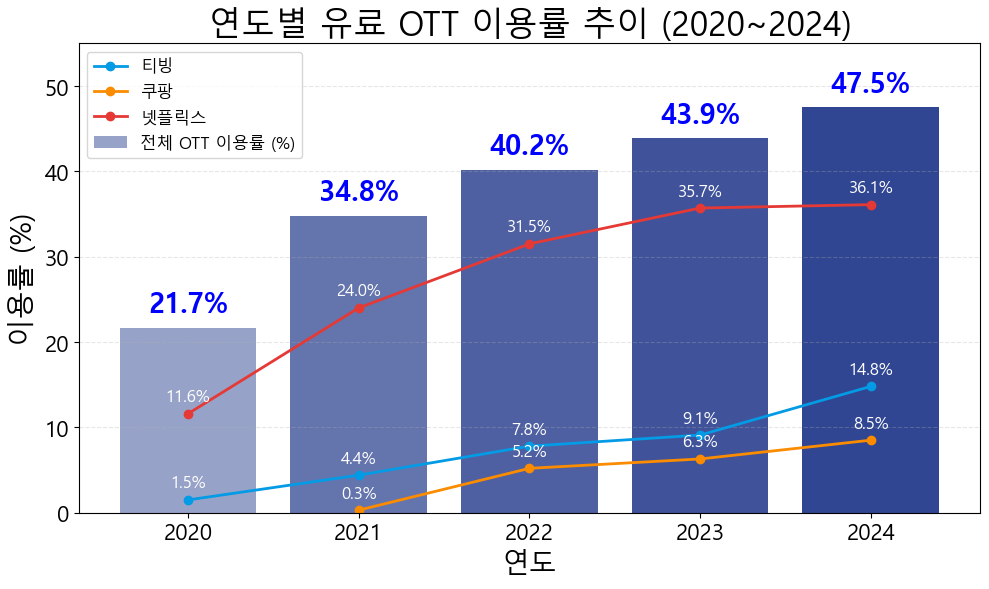

In [7]:
import matplotlib.pyplot as plt

# 1) alpha 계산 (0.3~1.0)
min_rate = trend_df['OTT_Use'].min()
max_rate = trend_df['OTT_Use'].max()
alphas = (trend_df['OTT_Use'] - min_rate) / (max_rate - min_rate) * 0.5 + 0.5

# 2) RGBA 리스트 생성
base_rgb = (49/255, 70/255, 146/255)
colors = [(base_rgb[0], base_rgb[1], base_rgb[2], alpha) for alpha in alphas]
line_colors = {
    "티빙": "#039BE5",
    "쿠팡": "#FB8C00",
    "넷플릭스": "#E53935"
}

## 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 전체 OTT 이용률 막대그래프: 색상 대신 RGBA 리스트 사용
bars = ax.bar(
    trend_df.index,
    trend_df["OTT_Use"],
    color=colors,
    label="전체 OTT 이용률 (%)"
)

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.1f}%",
        ha='center', va='bottom',
        fontsize=20, fontweight='bold', color='blue'
    )

# 개별 플랫폼 선그래프
for platform_en, platform_kr in [("Tving", "티빙"), ("Coupang", "쿠팡"), ("Netflix", "넷플릭스")]:
    valid = trend_df[platform_en].notna()
    x_vals = trend_df.index[valid]
    y_vals = trend_df.loc[valid, platform_en]
    ax.plot(
        x_vals, y_vals,
        marker='o', linewidth=2,
        color=line_colors[platform_kr],
        label=platform_kr
    )
    for x, y in zip(x_vals, y_vals):
        ax.text(
            x, y + 1,
            f"{y:.1f}%",
            ha='center', va='bottom', color='white',
            fontsize=12
        )

# 축·제목 설정
ax.set_ylabel("이용률 (%)", fontsize=20)
ax.set_ylim(0, 55)
ax.set_xlabel("연도", fontsize=20)
ax.set_xticks(trend_df.index)
ax.set_xticklabels(trend_df.index, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_title("연도별 유료 OTT 이용률 추이 (2020~2024)", fontsize=24)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

---
## 시각화2
### `더 글로리 전세계 누적 시청 시간 변화`
데이터: `전세계_Netflix_이용자들의_시청_데이터_기반_집계_인기_콘텐츠_순위.xlsx`

In [8]:
import pandas as pd
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.dates as mdates
import datetime
import numpy as np

In [9]:
file = r"C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\전세계_Netflix_이용자들의_시청_데이터_기반_집계_인기_콘텐츠_순위.xlsx"
net = pd.read_excel(file, header=0)
net.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,runtime_override_flag,episode_launch_dtls
0,2025-05-11,Films (English),1,Nonnas,NaN,29000000,1.9000,15300000.0,1,False,"[{is_staggered_launch=0, is_live_title=0}]",NaN
1,2025-05-11,Films (English),2,Inside Man: Most Wanted,NaN,21800000,1.7667,12300000.0,1,False,"[{is_staggered_launch=0, is_live_title=0}]",NaN
2,2025-05-11,Films (English),3,A Deadly American Marriage,NaN,16900000,1.7167,9800000.0,1,False,"[{is_staggered_launch=0, is_live_title=0}]",NaN
3,2025-05-11,Films (English),4,Havoc,NaN,16300000,1.7833,9100000.0,3,False,"[{is_staggered_launch=0, is_live_title=0}]",NaN
4,2025-05-11,Films (English),5,Twilight,NaN,8700000,2.0333,4300000.0,4,False,"[{is_staggered_launch=0, is_live_title=0}]",NaN


In [10]:
# The Glory 필터링
glory_df = net[net["show_title"] == "The Glory"].copy()

# 날짜 오름차순 정렬
glory_df = glory_df.sort_values(by="week")

# 날짜형 변환 (선택)
glory_df["week"] = pd.to_datetime(glory_df["week"])

glory_df["cumulative_hours"] = glory_df["weekly_hours_viewed"].cumsum()

In [11]:
cut1 = pd.to_datetime("2023-02-01")
cut2 = pd.to_datetime("2023-03-09")

C:\Users\chs02\AppData\Local\Temp\ipykernel_23372\3707298178.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


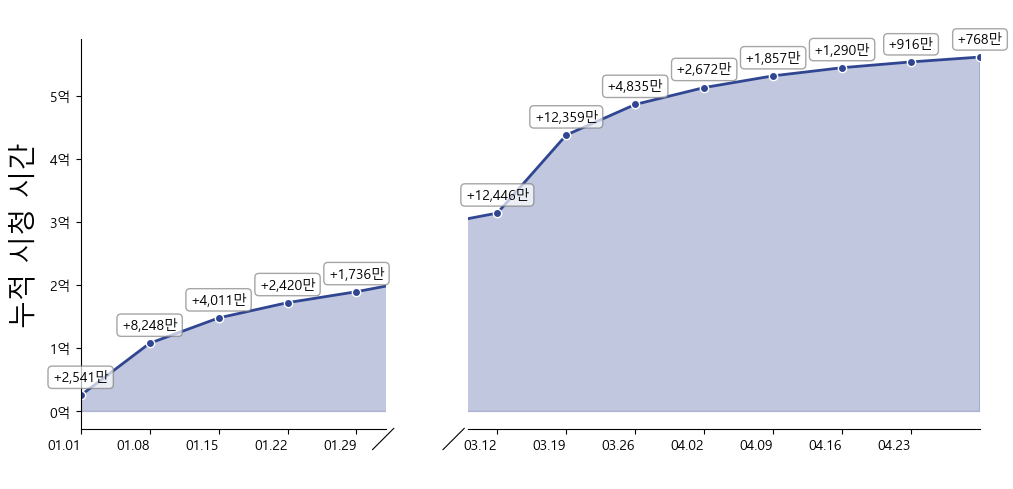

In [12]:
fig = plt.figure(figsize=(10, 5))
bax = brokenaxes(
    xlims=(
        (glory_df["week"].min(), cut1),
        (cut2, glory_df["week"].max())
    ),
    hspace=0.05
)

# 베이스 컬러 정의 (RGB)
base_rgb = (49/255, 70/255, 146/255)

# 1) 누적 영역: color 파라미터 추가
bax.fill_between(
    glory_df["week"],
    glory_df["cumulative_hours"],
    color=base_rgb,  # 여기서 색 지정
    alpha=0.3
)

# 2) 선 + 마커: color 파라미터 추가
bax.plot(
    glory_df["week"],
    glory_df["cumulative_hours"],
    marker="o",
    linewidth=2,
    linestyle="-",
    color=base_rgb,    # 선 색 지정
    markerfacecolor=base_rgb,  # 마커 속 채우기 색
    markeredgecolor="white"    # 마커 테두리 색 (선택)
)

# 3) 주간 증가분 레이블 (점 위로 약간 띄워서)
for week, inc, cum in zip(
    glory_df["week"],
    glory_df["weekly_hours_viewed"],
    glory_df["cumulative_hours"]
):
    ax = bax.axs[0] if week <= cut1 else bax.axs[1]
    ax.annotate(
        f"+{int(inc/10_000):,}만",
        xy=(week, cum),             # 마커 점 위치
        xytext=(0, 8),              # x:0, y:5 points 위로
        textcoords='offset points',
        ha="center",
        va="bottom",
        fontsize=10,
        bbox={
            "boxstyle": "round,pad=0.3",
            "facecolor": "white",
            "edgecolor": "gray",
            "alpha": 0.7
        }
    )

# 4) y축: 1억 단위 눈금, 레이블은 “억”
for ax in bax.axs:
    ax.yaxis.set_major_locator(mticker.MultipleLocator(100_000_000))
    ax.yaxis.set_major_formatter(
        mticker.FuncFormatter(lambda x, pos: f"{int(x/100_000_000)}억")
    )
    # Major ticks 매주
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d'))
    
    # 레이블 회전·정렬
    for label in ax.get_xticklabels():
        label.set_ha('right')

    # 3) 기존 tick 위치 가져오기 (숫자형, 1.0 = 1일)
    orig_locs = ax.get_xticks()
    # 4) 2일만큼 앞으로 이동
    ax.set_xticks(orig_locs-2)

# 축·제목 설정 (폰트 크기 20)
bax.set_xlabel("주간", fontsize=20, color='white')
bax.set_ylabel("누적 시청 시간", fontsize=20)
bax.set_title("더 글로리 – 누적 시청 시간 변화", fontsize=20, color='white')


plt.tight_layout()
plt.show()

## 시각화2-2
### `더 글로리 한국 TOP10 누적 횟수`
데이터: `2025-05-13_South_Korea_weekly_Top10.xlsx`

In [13]:
file_path = r"C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\2025-05-13_South_Korea_weekly_Top10.xlsx"
netflix = pd.read_excel(file_path)

# 넷플릭스에서 누적 top10 높은 show
top_titles = (
    netflix.sort_values('cumulative_weeks_in_top_10', ascending=False)
           .drop_duplicates(subset='show_title', keep='first')
           .reset_index(drop=True)
)
top_titles.head(10)

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,South Korea,KR,2023-02-19,TV,9,I am Solo,I am Solo: Part 9 - Part 12,32
1,South Korea,KR,2022-12-11,TV,10,Hospital Playlist,Hospital Playlist: Season 2,24
2,South Korea,KR,2023-04-23,TV,10,Mr. Sunshine,Mr. Sunshine: Season 1,23
3,South Korea,KR,2025-04-06,TV,8,Solo Leveling,Solo Leveling: Season 1,19
4,South Korea,KR,2025-01-12,TV,7,Squid Game,Squid Game: Season 1,19
5,South Korea,KR,2023-01-15,TV,8,Alchemy of Souls,Alchemy of Souls: Part 1,19
6,South Korea,KR,2023-05-07,TV,10,The Glory,The Glory: Season 1,19
7,South Korea,KR,2022-10-16,TV,9,Extraordinary Attorney Woo,Extraordinary Attorney Woo: Season 1,16
8,South Korea,KR,2022-05-29,TV,10,Twenty Five Twenty One,Twenty Five Twenty One: Limited Series,15
9,South Korea,KR,2022-03-20,TV,8,Our Beloved Summer,Our Beloved Summer: Limited Series,15


In [14]:
top_titles = top_titles.iloc[1:].reset_index(drop=True)
top_titles[['country_name','season_title', 'cumulative_weeks_in_top_10']].head(6)

,country_name,season_title,cumulative_weeks_in_top_10
0,South Korea,Hospital Playlist: Season 2,24
1,South Korea,Mr. Sunshine: Season 1,23
2,South Korea,Solo Leveling: Season 1,19
3,South Korea,Squid Game: Season 1,19
4,South Korea,Alchemy of Souls: Part 1,19
5,South Korea,The Glory: Season 1,19


In [15]:
# 1) 상위 6개만 추출
head10 = top_titles[['country_name','season_title','cumulative_weeks_in_top_10']].head(6).copy()

# 2) 공동순위 계산
head10['순위'] = (
    head10['cumulative_weeks_in_top_10']
    .rank(ascending=False, method='min')
    .astype(int)
    .astype(str) + '위'
)

# 3) country_name 제거 및 컬럼 재배치
head10 = head10[['순위', 'season_title', 'cumulative_weeks_in_top_10']]

# 4) 누적 주수 값에 '회' 단위를 붙여 문자열로 변환
head10['누적 TOP10 횟수'] = (
    head10['cumulative_weeks_in_top_10']
    .astype(int)
    .astype(str) + '회'
)

# 5) 열 이름 한글로 변경 및 불필요 컬럼(drop)
head10 = head10[['순위', 'season_title', '누적 TOP10 횟수']]
head10.columns = ['순위', '시즌 제목', '누적 TOP10 횟수']

# 6) 결과 확인
head10

,순위,시즌 제목,누적 TOP10 횟수
0,1위,Hospital Playlist: Season 2,24회
1,2위,Mr. Sunshine: Season 1,23회
2,3위,Solo Leveling: Season 1,19회
3,3위,Squid Game: Season 1,19회
4,3위,Alchemy of Souls: Part 1,19회
5,3위,The Glory: Season 1,19회


---
## 시각화3
### `월간 네이버 검색량 및 언론기사 수 백분위 추이`
데이터: `2_네이버키워드.xlsx`, `2_뉴스기사.xlsx`, `3_뉴스기사.xlsx`

In [16]:
file = r"C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\2_네이버키워드.xlsx"
naver = pd.read_excel(file, header=6)
naver.head()

C:\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,학교폭력
0,2022-01-01,1.18408
1,2022-01-02,2.31309
2,2022-01-03,3.09100
3,2022-01-04,3.06347
4,2022-01-05,2.90513


In [17]:
# 전처리 2: naver의 '날짜'도 datetime으로 변환 (이미 datetime이면 생략 가능)
naver['날짜'] = pd.to_datetime(naver['날짜'])
naver

,날짜,학교폭력
0,2022-01-01,1.18408
1,2022-01-02,2.31309
2,2022-01-03,3.09100
3,2022-01-04,3.06347
4,2022-01-05,2.90513
...,...,...
1259,2025-06-13,7.11138
1260,2025-06-14,2.56092
1261,2025-06-15,2.52650
1262,2025-06-16,6.05121


In [18]:
file1 = r"C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\2_뉴스기사.xlsx"
news1 = pd.read_excel(file1, header=0)

file2 = r"C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\3_뉴스기사.xlsx"
news2 = pd.read_excel(file2, header=0)

C:\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [19]:
news = pd.concat([news1, news2], ignore_index=True)
news.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.600601e+06,20241231,새전북신문,양정선,"전북대, 2025학년도 정시모집 원서접수 시작",사회>교육_시험,IT_과학>IT_과학일반,사회>여성,NaN,NaN,NaN,NaN,"경상,가군,가산,한국,나군","전북대,유웨이,사회과학,전북대학교","전북대,학년도,정시,모집,원서,접수,시작,정시모집,전북대학교,학년도,정시,모집,시작...","전북대,정시모집,원서접수,전북대학교,가군,치의예과,수의예과,약학과,학년도,경상,고졸...",전북대학교 2025학년도 정시모집이 시작됐다. 마감은 오는 3일 오후 6시까지다. ...,http://sjbnews.com/news/news.php?number=837589,NaN
1,1.101101e+06,20241231,한국일보,최은서,고교 무상교육 정부 지원 3년 연장 딥페이크 성범죄도 학폭 처벌,사회>교육_시험,정치>행정_자치,사회>노동_복지,NaN,NaN,NaN,이주호,NaN,"시도교육청,정부,교원,더불어민주당,국회,교육부,교육위원회,교육청,방과후학교","고교,무상,교육,정부,지원,연장,딥페이크,성범죄,학폭,처벌,국회,본회의,반발,교육부...","교육부,딥페이크,개정안,고등학교,교육청,영상물,성범죄,부총리,지방교육재정교부금법,공...",고등학교 무상교육 경비 일부를 국비로 지원하는 특례가 3년 연장된다. 내년 이후 예...,https://www.hankookilbo.com/News/Read/A2024123...,NaN
2,1.100901e+06,20241231,중앙일보,NaN,"한국 로타리, 2024 봉사활동 사례 발표",사회>장애인,NaN,NaN,재해>자연재해>태풍,사고>스포츠사고,NaN,"차차기,윤상구","하노이,수해,로타리,네팔,경기,몰운대,태풍 피해,한국,베트남,카트만두,필리핀,개봉동...","로타리,서울무악로타리클럽,지역아동센터,NGO,부산누리마루로타리클럽,국제로타리,Smi","한국,로타리,사례,봉사,활동,사례,한국,로타리,2024년,사례,봉사,활동,봉사,가치...","베트남,한국,구순구개열,600만,서울무악로타리클럽,발표회,봉사활동,국제로타리,개봉동...","한국 로타리가 2024년 한 해 동안 펼친 국내외 봉사활동 사례를 발표하며, 나눔과...",https://www.joongang.co.kr/article/25304280,NaN
3,1.101101e+06,20241231,한국일보,정지용,"'국가 범죄 시효 폐지' 野 주도로 국회 통과 與 ""수사기관 탄압"" 반발",정치>행정_자치,정치>청와대,사회>교육_시험,NaN,NaN,NaN,최상목,영상도,"게임산업진흥 개정안,군사정권,주택도시보증공사(,정부,민주당,검찰,기획재정부,경찰,더...","국가,범죄,시효,폐지,주도,국회,통과,탄압,수사,기관,반발,고교,무상,교육,국비,지...","피해자,개정안,딥페이크,부총리,사업자,수사기관,임차인,전세사기,본회의,소유주,최상목...",고교 무상교육 예산 절반가량을 정부와 지방교육청이 나눠 부담하는 규정이 3년 더 연...,https://www.hankookilbo.com/News/Read/A2024123...,NaN
4,1.500501e+06,20241231,대구일보,김형규 기자,"경북교육청, 2025년 마음건강 지원으로 '교육공동체 회복' 나선다",사회>교육_시험,지역>충남,지역>충북,NaN,NaN,NaN,헤아림,"함양,전문강사,오남","교육공동체,경북도교육청,초중학교,경북교육감,경북교육청,도교육청,교원,경묵교육청","경북교육청,지원,마음,건강,교육,공동체,회복,경묵교육청,경북도교육청,심리,사회적,정...","학부모,마음성장,학교폭력,교육공동체,공동체,교육주체들,신청학교,임종식,온자람,다국어...",경묵교육청 경북도교육청이 2025년 심리적 사회적 정서적으로 어려움을 겪는 교육주체...,https://www.idaegu.com/news/articleView.html?i...,NaN


In [20]:
date_counts_df = news['일자'].value_counts().reset_index()
date_counts_df.columns = ['일자', '기사수']

In [21]:
# 전처리 1: date_counts_df의 '일자'를 datetime으로 변환
date_counts_df['일자'] = pd.to_datetime(date_counts_df['일자'], format="%Y%m%d")
date_counts_df = date_counts_df.sort_values(by='일자').reset_index(drop=True)
date_counts_df

,일자,기사수
0,2022-01-01,1
1,2022-01-02,3
2,2022-01-03,4
3,2022-01-04,5
4,2022-01-05,30
...,...,...
1076,2024-12-27,8
1077,2024-12-28,5
1078,2024-12-29,7
1079,2024-12-30,25


In [22]:
# 병합 (left join 기준: naver에 기사수 붙이기)
merged_df = pd.merge(naver, date_counts_df, left_on='날짜', right_on='일자', how='left')
merged_df.drop(columns=['일자'], inplace=True)
merged_df

,날짜,학교폭력,기사수
0,2022-01-01,1.18408,1.0
1,2022-01-02,2.31309,3.0
2,2022-01-03,3.09100,4.0
3,2022-01-04,3.06347,5.0
4,2022-01-05,2.90513,30.0
...,...,...,...
1259,2025-06-13,7.11138,NaN
1260,2025-06-14,2.56092,NaN
1261,2025-06-15,2.52650,NaN
1262,2025-06-16,6.05121,NaN


In [23]:
# 2025년 이후 짜르기
cutoff = pd.to_datetime('2024-01-01')
merged_df = merged_df[merged_df['날짜'] < cutoff].reset_index(drop=True)
merged_df

,날짜,학교폭력,기사수
0,2022-01-01,1.18408,1.0
1,2022-01-02,2.31309,3.0
2,2022-01-03,3.09100,4.0
3,2022-01-04,3.06347,5.0
4,2022-01-05,2.90513,30.0
...,...,...,...
725,2023-12-27,5.43852,33.0
726,2023-12-28,4.87401,28.0
727,2023-12-29,4.37835,26.0
728,2023-12-30,2.34751,2.0


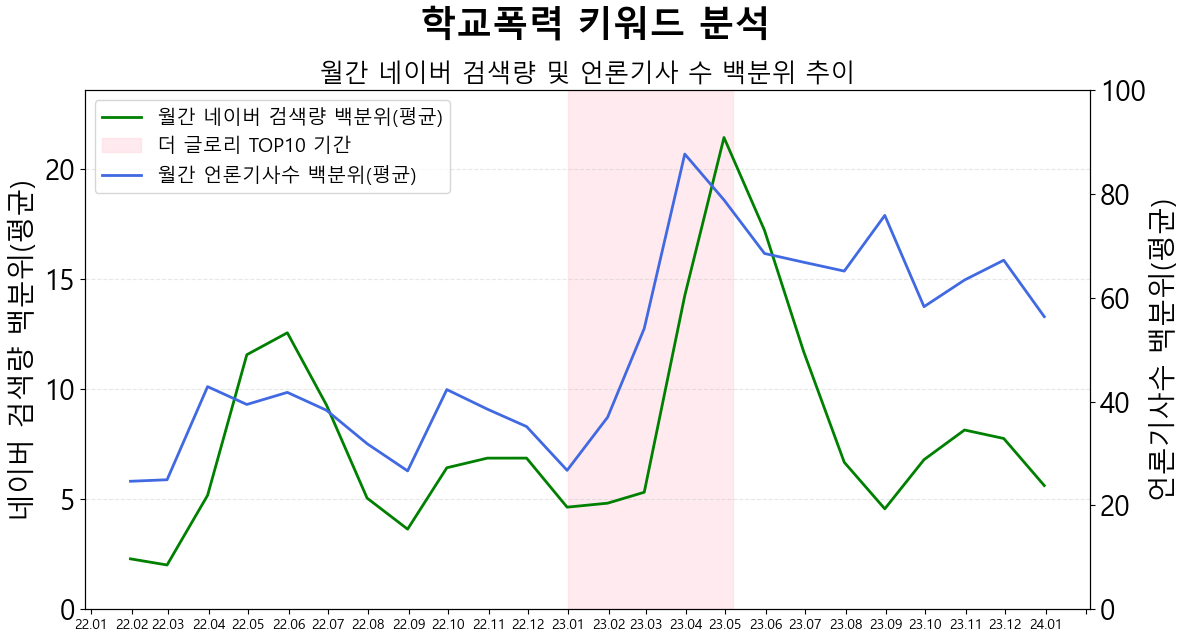

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) 날짜를 datetime으로 변환 및 인덱스 설정
merged_df['날짜'] = pd.to_datetime(merged_df['날짜'])
df = merged_df.set_index('날짜')

# 2) 일별 기사수 백분위 계산 (이미 계산해 두었다면 생략)
df['기사수_백분위'] = df['기사수'].rank(pct=True) * 100

# 3) 월간 집계
monthly = df.resample('M').agg({
    '학교폭력': 'mean',        # 월간 네이버 검색량 평균
    '기사수_백분위': 'mean'     # 월간 기사수 백분위 평균
})

# 4) 시각화
fig, ax1 = plt.subplots(figsize=(12, 6.5))

# 왼쪽 y축: 네이버 검색량 (초록 선)
ax1.plot(monthly.index, monthly['학교폭력'],
         color='green', linewidth=2,
         label='월간 네이버 검색량 백분위(평균)')
ax1.set_ylabel('네이버 검색량 백분위(평균)', fontsize=20)
ax1.set_ylim(0, monthly['학교폭력'].max() * 1.1)

# 피크 시점 하이라이트
start_peak = pd.to_datetime('2023-01-01')
end_peak   = pd.to_datetime('2023-05-07')
ax1.axvspan(start_peak, end_peak, color='pink', alpha=0.3,
            label='더 글로리 TOP10 기간')


# x축 포맷: yy.mm
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y.%m'))
plt.xticks(rotation=0,fontsize=10)
ax1.tick_params(axis='y', labelsize=10)

# — 여기서 마지막 '24.02' 라벨 숨기기 —
for lbl in ax1.get_xticklabels():
    if lbl.get_text() == '24.02':
        lbl.set_visible(False)

# 오른쪽 y축: 기사수 백분위
ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly['기사수_백분위'],
         color='royalblue', linewidth=2,
         label='월간 언론기사수 백분위(평균)')
ax2.set_ylabel('언론기사수 백분위(평균)', fontsize=20)
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', labelsize=20)

# 범례
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
           loc='upper left', fontsize=14, title_fontsize=14)

plt.xticks(rotation=0, fontsize=10)
ax1.tick_params(axis='y', labelsize=20)

plt.suptitle("학교폭력 키워드 분석", fontsize=26, fontweight='bold') # 제목 및 그리드
ax1.set_title("월간 네이버 검색량 및 언론기사 수 백분위 추이", fontsize=18) # # 부제목

plt.tight_layout(rect=[0, 0, 1, 0.95])  # suptitle 공간 확보
ax1.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 시각화4
### `연도별 학교폭력예방*대책법 개정안 의결 현황`
데이터: `학교폭력의안.xlsx`

In [25]:
file_path = r"C:\\Users\\chs02\\OneDrive\\바탕 화면\\현스기과제\\(2025) 3학년 1학기\\공모전\\데이터\\학교폭력의안.xlsx"
proposal_sv = pd.read_excel(file_path, header=1)

C:\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
proposal_sv['제안일자'] = pd.to_datetime(proposal_sv['제안일자'], errors='coerce')
proposal_sv['제안연도'] = proposal_sv['제안일자'].dt.year

# 2007년~2024년 필터
mask = (proposal_sv['제안연도'] > 2007) & (proposal_sv['제안연도'] < 2025)
proposal_sv = proposal_sv[mask]

year_counts = proposal_sv['제안연도'].value_counts().sort_index()

In [27]:
df = proposal_sv.copy()

In [28]:
# 1. 결과 단순화 함수
def simplify_result(result):
    if result in ['원안가결', '수정가결']:
        return '가결'
    elif result == '대안반영폐기':
        return '대안반영'
    elif result in ['임기만료폐기', '폐기', '철회']:
        return '불통과'
    else:
        return '기타'

# 2. 결과 단순화 컬럼 생성
df['단순결과'] = df['의결결과'].apply(simplify_result)

# 3. 연도 × 단순결과로 그룹화
pivot = df.groupby(['제안연도', '단순결과']).size().unstack(fill_value=0)

# 4. 색상 지정
color_map = {
    '기타': '#4DD0E1',
    '가결': '#4CAF50',      # 초록
    '대안반영': '#FFA726',   # 오렌지
    '불통과': '#E57373'     # 연한 빨강
}
colors = [color_map[col] for col in pivot.columns if col in color_map]

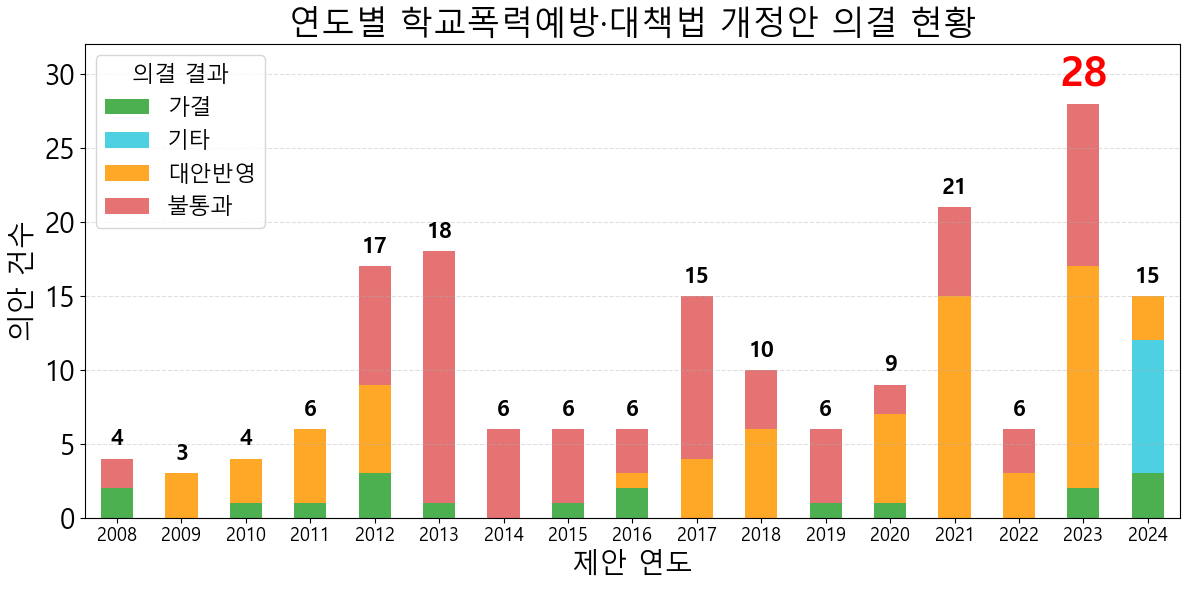

In [29]:
# 5. 누적 막대그래프 시각화
ax = pivot.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# 연도별 총 건수 계산
totals = pivot.sum(axis=1)
max_year = totals.idxmax()    # 피크 연도 (예: 2023)
max_value = totals.max()      # 피크 값 (예: 28)

# 6. 그래프 꾸미기
ax.set_xlabel("제안 연도", fontsize=20)
ax.set_ylabel("의안 건수", fontsize=20)
ax.set_title("연도별 학교폭력예방·대책법 개정안 의결 현황", fontsize=24)
ax.legend(title="의결 결과", fontsize=16, title_fontsize=16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=20)

# y축 범위 조금 여유 있게 설정
ax.set_ylim(0, 32)

# 총 건수 라벨 추가 및 피크 막대 강조
for idx, (year, total) in enumerate(totals.items()):
    ax.text(idx, total + max_value * 0.02,
            f"{total:.0f}",
            ha='center', va='bottom',
            fontsize=(30 if year == max_year else 16),
            fontweight='bold',
            color=('red' if year == max_year else 'black'))

        
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()